In [1]:
# Will Hollingsworth, Colton Murray, Alexander Shiveley

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Datasets

In [3]:
decision_lambda = lambda x1, x2: 1 if (x1 + (3 * x2) - 2) > 0 else -1

def gen_data():
    """
    Generates random data points and classifies them.
    """
    data = np.random.randint(low=-40, high=40, size=(100,2))
    classification = np.array([[decision_lambda(d[0], d[1])] for d in data])

    return np.hstack((data, classification))

In [4]:
def get_sets(data, split):
    """
    Convenience function that randomly selects a training and test set from the input data.
    
    :param data: (ndarray) the data you want to split
    :param split: (float) the percentage of the data you want to be TRAINING data
    
    :returns: (tuple) a tuple where the first element is the training set, and the second element is the test set
    """
    # Randomly shuffle the order from a copy of the data
    shuffled = data.copy()
    np.random.shuffle(shuffled)

    row_count = data.shape[0]

    # calc the number of samples, assumes the input samples are seperated by row
    training_count = round(row_count * split)
    
    training_set = shuffled[:training_count]
    test_set = shuffled[training_count:]
    
    return training_set, test_set

In [5]:
def split_pos_neg(data):
    """
    Returns two sets of positive, then negative examples (1's then -1's from the output column)
    """
    return data[data[:, -1]==1, :-1], data[data[:, -1]==-1, :-1]

In [79]:
# Find a balanced dataset of positive and negative samples
def get_balanced_data():
    ratio = -1
    while ratio == -1 or abs(1 - ratio) > 0.1:
        data = gen_data()
        pos, neg = split_pos_neg(data)

        # Check ratio of positive and negative samples
        ratio = len(pos) / len(neg)
    
    return data

# Perceptron (2 Input Linear Unit)

In [85]:
class linear_unit():
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs + 1)
        
    def output(self, data_point):
        """
        Returns the linear combination of the input and this unit's weights
        """
        # total = w0*1 + w1x1 + w2x2 + ...
        data_with_bias = np.hstack((np.array([1]), data_point[:-1]))
        t = data_with_bias * self.weights
        t = np.sum(t)
        
        return t
        
    def delta_rule(self, data, learning_rate, epochs ):
        """
        Performs the delta rule training for a given number of epochs using gradient descent
        """
        # From NN_MitchelChapter4-1.pdf on canvas          
        for ep in range(epochs): 
            delta_w = np.zeros(self.weights.shape[0])
            for d in data:
                d_with_bias = np.hstack((np.array([1]), d[:-1]))
                o = 1 if self.output(d) > 0 else -1
                delta_w = delta_w + learning_rate * (d[2] - o) * d_with_bias     
            self.weights = self.weights + delta_w
        
    def delta_rule_stochastic(self, data, learning_rate, epochs ):
        """
        Performs the delta rule training for a given number of epochs using stochastic gradient descent
        """
        # From NN_MitchelChapter4-1.pdf on canvas          
        for ep in range(epochs): 
            for d in data:
                d_with_bias = np.hstack((np.array([1]), d[:-1]))
                o = 1 if self.output(d) > 0 else -1
                self.weights = self.weights + learning_rate * (d[2] - o) * d_with_bias  
            
    def error(self, data):
        """
        Returns the sum squared error of the data using this unit's weights
        """
        sum = 0
        for d in data:
            o = 1 if self.output(d) > 0 else -1
            sum = sum + (d[2] - o)**2
        return sum

In [86]:
p = linear_unit(2)

In [88]:
data = get_balanced_data()
print(data[0])
print(p.weights)
print(p.output(data[0]))

# Train perceptron using gradient descent
p.delta_rule(data, 0.1, 50)
print(p.weights)
print(p.output(data[0]))

[21 31  1]
[0.01125102 0.54733561 0.25646995]
19.455867303707855
[  2.21125102  97.14733561 194.65646995]
8076.655867303709


In [89]:
p2 = linear_unit(2)
data2 = get_balanced_data()

print(data[0])
print(p2.weights)
print(p2.output(data[0]))

# Train perceptron using stochastic gradient descent
p2.delta_rule_stochastic(data2, 0.1, 50)
print(p2.weights)
print(p2.output(data[0]))

[21 31  1]
[0.14456159 0.9577021  0.39004451]
32.34768542001001
[-2.05543841  4.1577021  14.19004451]
525.1476854200101


In [90]:
# Alex - Weights make sense now where 1st is negative and others are positive. (actual is [-2, 1, 3])

In [91]:
print(p.error(data))
print(p2.error(data2))

0
0


In [204]:
def plot_error(unit, epochs):   
    """
    Plot the training error for up to some number of epochs
    """ 
    x = np.arange(epochs)
    y = []
    data = get_balanced_data()
    for i in range(epochs):
        unit.delta_rule(data, 0.1, 1)
        y.append(unit.error(data))
        
    plt.plot(x, y, '--r')
    plt.xlabel('# of Epochs')
    plt.ylabel('Error')
    plt.title('Error vs Training Epochs')
    plt.show()

def plot_decision_surface(unit):
    """
    Plot the decision surface for 5, 10, 50, and 100 epochs
    """ 
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
    
    counter = 0
    for row in axs:
        for ax in row:
            # Get data
            data = get_balanced_data()
            pos, neg = split_pos_neg(data)
            
            # Set axis limits
            ax.set_xlim(-40, 40)
            ax.set_ylim(-40, 40)
            
            # Train linear unit
            unit = linear_unit(2)
            if counter == 0:
                unit.delta_rule(data, .1, 5)
                ax.set_title('5 Epochs')
            elif counter == 1:
                unit.delta_rule(data, .1, 10)
                ax.set_title('10 Epochs')
            elif counter == 2:
                unit.delta_rule(data, .1, 50)
                ax.set_title('50 Epochs')
            else:
                unit.delta_rule(data, .1, 100)
                ax.set_title('100 Epochs')
            
            # Plot decision boundary
            x = np.arange(-40, 40)
            yf = lambda x: ((unit.weights[1] / unit.weights[2]) * -x) - unit.weights[0]
            y = [yf(d) for d in x]
            ax.plot(x, y, color='orange')
            ax.fill_between(x, y, 40, color='lightcoral')
            ax.fill_between(x, y, -40, color='lightblue')
            
            # Overlay training data
            ax.scatter(pos[:, 0], pos[:, 1], color='red')
            ax.scatter(neg[:, 0], neg[:, 1], color='blue')
            
            counter += 1
    
    plt.show()
    pass

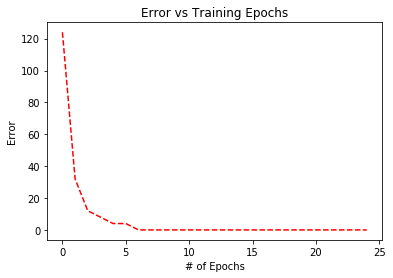

In [213]:
u = linear_unit(2)
plot_error(u, 25)

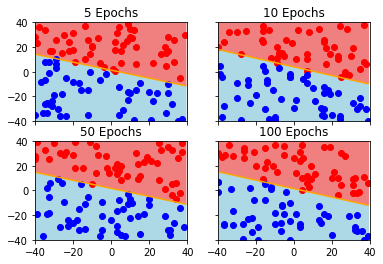

In [214]:
plot_decision_surface(u)

In [215]:
# Will -Not sure if we can scale these up or something. Also sometimes the 100 epochs one just freaks out and has crazy high error.